In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(wine_std)

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [13]:
df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df['target'] = wine.target
df['cluster'] = kmeans.labels_

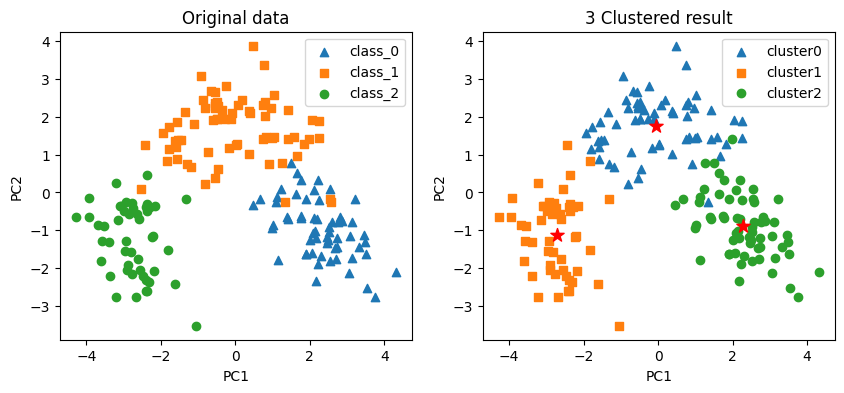

In [14]:
markers = ['^','s','o']
plt.figure(figsize=(10,4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label = wine.target_names[i])
        else :     
            plt.scatter(x_data, y_data, marker=marker, label = 'cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s= 100)
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data')
    else:
        plt.title('3 Clustered result')

plt.show()